In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os

In [2]:
def read_namelist(relative_path):
    """
    Read a Fortran namelist file and extract parameters from a relative path.

    Parameters:
    relative_path (str): Relative path to the namelist file from the notebook.

    Returns:
    dict: Dictionary of parameters read from the file.
    """
    # Construct the full path using the notebook's directory
    notebook_dir = os.getcwd()  # Gets the directory of the current script
    file_path = os.path.join(notebook_dir, relative_path)  # Constructs the full path

    params = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('&') or line.startswith('/'):
                    continue
                key_value = line.split('=')
                if len(key_value) == 2:
                    key = key_value[0].strip()
                    value = key_value[1].strip().rstrip('/')
                    # Convert numerical values from strings
                    if value.isdigit():
                        value = int(value)
                    else:
                        try:
                            value = float(value)
                        except ValueError:
                            pass  # Keep as string if it's not a number
                    params[key] = value
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return params

In [3]:
def read_weights(file_path):
    """
    Reads a text file containing object data and returns an array of weights (masses).
    
    Parameters:
    file_path (str): Path to the input text file.
    
    Returns:
    numpy.ndarray: Array of weights (masses).
    """
    try:
        # Read the file and skip the last line (header comment)
        data = np.genfromtxt(file_path, comments='#')
        
        # Extract the masses (first column)
        weights = data[:, 0]
        
        return weights
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    
def relativ_weights(weights):

    # Normalize the weights
    total_mass = np.max(weights)
    return weights / total_mass



In [19]:
def read_netcdf(filename):
    try:
         # Open the NetCDF file
        dataset = nc.Dataset(filename, 'r')

        # Read the positions variable
        positions = dataset.variables['positions'][:]

        # Get the dimensions
        xyz, object,  iter = positions.shape
        print(f"Read {object} objects with {xyz} coordinates and {iter} iterations")

        return positions
    except Exception as e:
        print(f"An error occurred: {e}")

def plot_positions(positions, weights):
    # Get the dimensions
    # print(positions.shape)
    xyz, object, iter = positions.shape

    # Create a figure
    fig = plt.figure()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the positions
    for i in range(object):
        print(f"Plotting object {i}")
        x = positions[0, i, :]
        y = positions[1, i, :]
        z = positions[2, i, :]
        ax.plot(x, y, z, label=f'Object {i}')

    # Plot the last position of each object
    for i in range(object):
        x = positions[0, i, -1]
        y = positions[1, i, -1]
        z = positions[2, i, -1]
        ax.plot(x, y, z,  marker='o', markersize=weights[i]*1, color='red')

    # Set the labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_title('Object positions')
    #ax.legend()

    # Show the plot
    plt.show()


In [21]:
relative_path = '../../data/namelist/1000obj.nml'
parameters = read_namelist(relative_path)
print(parameters)
# Example usage
file_path = '../../data/objects/1000obj.txt'
weights = read_weights(file_path)
print(weights)

rel_weights = relativ_weights(weights)
print(rel_weights)


Error: The file '/home/fillies/Documents/Uni_Projects/3_Body_system/src/notebooks/../../data/namelist/1000obj.nml' does not exist.
{}
[1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11 1.e+11
 1.e+11 1.e+11

Read 1000 objects with 3 coordinates and 100000 iterations
(3, 1000, 100000)
Plotting object 0
Plotting object 1
Plotting object 2
Plotting object 3
Plotting object 4
Plotting object 5
Plotting object 6
Plotting object 7
Plotting object 8
Plotting object 9
Plotting object 10
Plotting object 11
Plotting object 12
Plotting object 13
Plotting object 14
Plotting object 15
Plotting object 16
Plotting object 17
Plotting object 18
Plotting object 19
Plotting object 20
Plotting object 21
Plotting object 22
Plotting object 23
Plotting object 24
Plotting object 25
Plotting object 26
Plotting object 27
Plotting object 28
Plotting object 29
Plotting object 30
Plotting object 31
Plotting object 32
Plotting object 33
Plotting object 34
Plotting object 35
Plotting object 36
Plotting object 37
Plotting object 38
Plotting object 39
Plotting object 40
Plotting object 41
Plotting object 42
Plotting object 43
Plotting object 44
Plotting object 45
Plotting object 46
Plotting object 47
Plotting object 48
Pl

<Figure size 640x480 with 0 Axes>

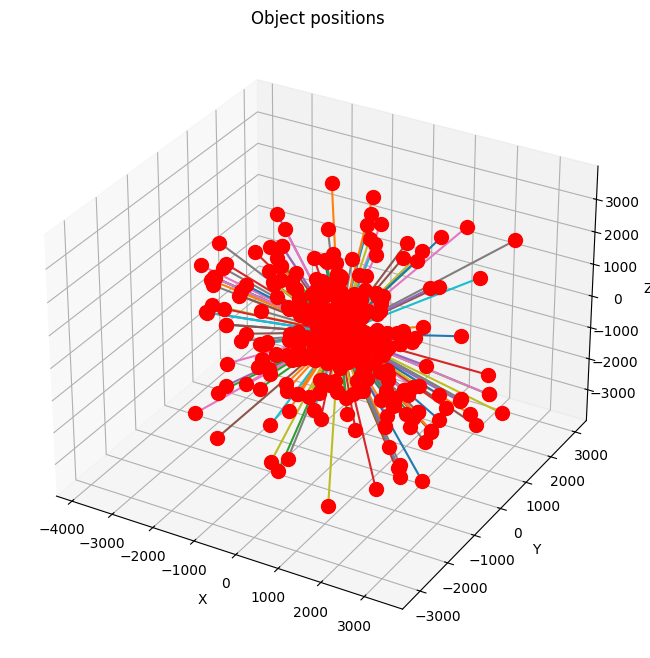

In [26]:
#execute fotran
#!/home/fillies/Documents/Uni_Projects/3_Body_system/shell_scripts/main.sh

# Example usage
filename = '/home/fillies/Documents/Uni_Projects/3_Body_system/data/pos.nc'
positions = read_netcdf(filename)

#print(positions)
print(positions.shape)

if positions is not None:
    plot_positions(positions[:,:,:], rel_weights)

fillies@fillies:~/Documents/Uni_Projects/3_Body_system$ ./shell_scripts/main.sh 
Compiling the main program...
Linking object files to create executable...
Compilation and linking completed successfully :0
Running the program...
 n_max:         1000
 dt:    1.0000000000000000E-003
 nsteps:       100000
 outfile: data/pos.nc                                       
 objectfile: data/objects/1000obj.txt                          
 nthreads:           10
 Initializing with         1000  objects
 NetCDF file structure defined successfully:data/pos.nc
 Elapsed time (seconds):    3886.4260253906250     
Program executed successfully :~)

Read 2 objects with 3 coordinates and 100000 iterations
{'n_max': 2, 'dt': 0.001, 'nsteps': 100000, 'outfile': '"data/1big_1small.nc"', 'objectfile': '"data/objects/1big_1small.txt"'}
[1.e+11 1.e+01]
[1.e+00 1.e-10]
Plotting object 0
Plotting object 1


<Figure size 640x480 with 0 Axes>

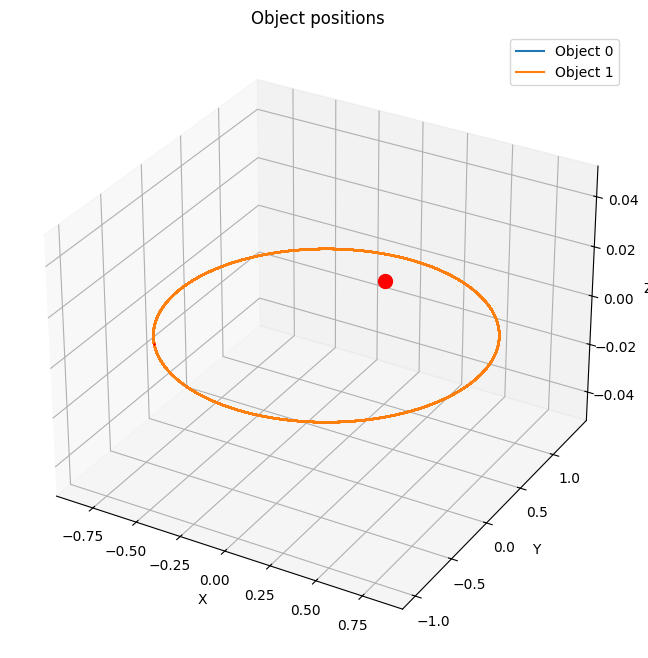

In [57]:
#execute fotran
#!/home/fillies/Documents/Uni_Projects/3_Body_system/shell_scripts/main.sh

# Example usage
filename = '../../data/1big_1small.nc'
positions = read_netcdf(filename)

relative_path = '../../data/namelist/1big_1small.nml'
parameters = read_namelist(relative_path)
print(parameters)
# Example usage
file_path = '../../data/objects/1big_1small.txt'
weights = read_weights(file_path)
print(weights)

rel_weights = relativ_weights(weights)
print(rel_weights)

if positions is not None:
    plot_positions(positions, rel_weights)

In [ ]:
[1, 2, 5, 10] #Threads
[1, 10, 100, 500, 1000] #Objects 
#nsteps=10000
[4.1000001132488251E-002, 0.58799999952316284, 6.7670001983642578, 143.89300537109375, 400.47900390625000]
[0.44699999690055847, 0.72899997234344482, 6.3470001220703125, 109.44799804687500, 328.64999389648438]
[0.53899997472763062, 0.72299998998641968, 9.5979995727539062, 150.02900695800781, 392.69000244140625]
[0.51800000667572021, 1.2599999904632568, 28.222000122070312, 193.15699768066406, 400.57800292968750]
[0.85699999332427979, 3.0490000247955322, 10.826999664306641, 207.15600585937500, 799.69598388671875]




In [1]:
nsteps=100000
[2.4260001182556152, 11.479000091552734, 141.04100036621094, , ]
[2.0759999752044678, 10.899000167846680, 104.17099761962891, , ]
[6.1729998588562012, 11.640000343322754, 173.90600585937500, , ]
[14.888999938964844, 40.152000427246094, 223.27600097656250, , ]
[, , , , ]


SyntaxError: invalid syntax (2530297338.py, line 2)

In [ ]:
nsteps=10
[1, 10, 100, 1000, 10000] #Objects 
[1.0000000474974513E-003, 1.0000000474974513E-003, 2.0000000949949026E-003, 9.6000000834465027E-002, 16.392000198364258]
[2.0000000949949026E-003, 1.0000000474974513E-003, 3.0000000260770321E-003, 6.4000003039836884E-002, 10.821000099182129]
[1.0000000474974513E-003, 1.0000000474974513E-003, 2.0000000949949026E-003, 4.3000001460313797E-002, 8.2419996261596680]
[2.0000000949949026E-003, 1.0000000474974513E-003, 2.0000000949949026E-003, 2.4000000208616257E-002, 7.2230000495910645]
[2.0000000949949026E-003, 1.0000000474974513E-003, 3.0000000260770321E-003, 3.7000000476837158E-002, 6.1370000839233398]

In [2]:
nsteps=1000
[1.8999999389052391E-002, 5.4000001400709152E-002, 0.52100002765655518, 29.256000518798828, ]
[1.9999999552965164E-002, 5.6000001728534698E-002, 0.82400000095367432, 24.771999359130859 , ]
[2.3000000044703484E-002, 6.4000003039836884E-002, 1.6410000324249268, 22.729000091552734, ]
[4.6000000089406967E-002, 9.6000000834465027E-002, 0.49099999666213989, 29.822000503540039, ]
[0.11100000143051147, 1.2970000505447388, 1.2970000505447388, 33.015998840332031, ]

[0.11100000143051147,
 1.2970000505447388,
 1.2970000505447388,
 33.01599884033203]

In [ ]:
nsteps=100
[1, 2, 5, 10] #Threads
[100, 500, 1000, 5000, 10000, 100000, 1000000] #Objects 

[6.4999997615814209E-002, 0.35100001096725464,     1.7180000543594360, 40.712001800537109, 149.12600708007812, , ]
[1.2000000104308128E-002, 0.15899999439716339,     0.5759999752044677, 27.733999252319336, 110.38500213623047, , ]
[1.3000000268220901E-002, 9.8999999463558197E-002, 0.4530000090599060, 22.586999893188477, 88.246002197265625, , ]
[1.4000000432133675E-002, 9.7999997437000275E-002, 0.3210000097751617, 17.184999465942383, 66.782997131347656, 8287.5966796875000, ]